# 1st Dataset

In [417]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('pd_speech_features.csv', sep=',')
data = data.sort_values('id', ascending=True)
data = data.drop_duplicates(subset='id', keep='last')


data = data.groupby('id').mean().reset_index()

#Fazer a média das 3 medições
data = data.groupby('id').mean().reset_index()

print(data.shape)



(252, 755)


# Outliers

In [418]:


def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out



y = data.pop('class').values
data.pop('id').values
df2 = pd.DataFrame(y, columns=['class'])

print(data.shape)
for i in data.keys():
    #print(i)
    data = remove_outlier(data,i)
#data[np.abs(data.Data-data.Data.mean()) <= (3*data.Data.std())]
data = pd.concat([data, df2], axis=1)
print(data.shape)

(252, 753)
(252, 754)


# Missing Values Imputation

Neste dataset não exisatem missing values.

In [419]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.976190,-0.978333,-0.980229,-0.984377,2.968254,2.956349,-0.988026,-0.988095,-0.988083,-0.988095,...,-0.392808,-0.616667,-0.668592,-0.815540,-0.867921,-0.845415,-0.896286,-0.923365,-0.915035,0.746032
std,0.217347,0.197797,0.180486,0.142651,36.262091,36.153531,0.109306,0.108680,0.108781,0.108674,...,6.851795,4.105710,4.046368,2.235634,1.537268,1.858724,1.133625,0.746185,0.855051,0.436146
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
max,1.000000,0.839150,0.682180,0.344460,351.000000,350.000000,0.006144,0.000082,0.001310,0.000008,...,91.495700,46.267500,60.761400,33.284900,22.355300,27.591200,15.641700,8.131200,10.742000,1.000000


# Normalization

Neste caso normalizamos ao valor unitário. To make sure that the different features take on similar ranges of values so that the classification algorithms can converge faster.

In [420]:
from sklearn.preprocessing import Normalizer



y = data.pop('class').values
df2 = pd.DataFrame(y, columns=['class'])


transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data = pd.concat([norm_data, df2], axis=1)

norm_data.describe(include='all')



,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,...,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,252.000000
mean,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,...,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,-3.600819e-02,0.746032
std,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960282e-03,3.960282e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,...,3.960279e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,3.960278e-03,0.436146
min,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,...,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,0.000000
25%,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,...,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,0.000000
50%,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,...,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,1.000000
75%,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,...,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,-3.644203e-02,1.000000
max,1.239646e-10,1.040249e-10,8.150176e-11,3.974305e-11,3.892488e-08,3.880092e-08,7.616083e-13,7.702699e-15,1.623936e-13,9.941960e-16,...,1.134223e-08,5.439331e-09,5.735623e-09,3.141956e-09,2.110247e-09,2.604494e-09,1.476511e-09,7.675513e-10,1.014000e-09,1.000000


# Variable Dummification

To use a single regression equation to represent multiple groups, we use dummification to get rid of cathegorical variables. Neste caso não nos é útil pois não temos variáveis simbólicas. (1st dataset)

In [421]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df

cols_nr = norm_data.select_dtypes(include='number')
cols_sb = norm_data.select_dtypes(include='category')
  
df = dummify(norm_data, cols_sb.columns)
df.describe(include='all')
df.to_csv(r'resultBeforeSMOTE.csv', index = False)

# Balance

Before heading on to classification, we should make sure that our dataset is balanced. This is important because unbalanced datasets tend to have a baias. This means that it tends to predict that that the classification is more probable to be a certain value, just because it saw more values of that kind in the training data.

In the supervised learning balancing we used SMOTE oversampling because it increases the variety of the dataset as well as its size. Wich are 2 particular adcantages to using undersampling,

We use this only in supervised learning approach. Because it is dependent on the target. In this case we never know the target values in a supervised approach and only use undersampling.

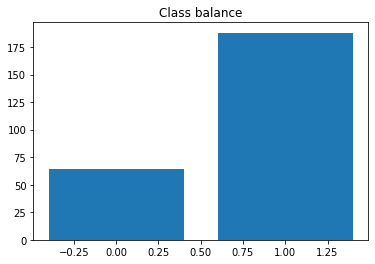

Majority class: 188
Minority class: 64
Proportion: 2.94 : 1


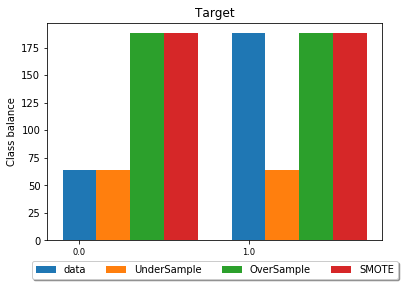

In [422]:
import numpy as np
import matplotlib.pyplot as plt



def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    



#Should have normalization and balancing...

#Balancing

unbal = df
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

##SMOTE

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'data': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()



In [423]:
import pandas as pd
from imblearn.over_sampling import SMOTE

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#data = pd.read_csv('pd_speech_features.csv', sep=',')
#data = data.sort_values('id', ascending=True)
#data = data.drop_duplicates(subset='id', keep='last')


#data = data.groupby('id').mean().reset_index()

#Fazer a média das 3 medições
#data = data.groupby('id').mean().reset_index()

df2 = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, df2], axis=1)

#print(df)

X = df.drop(columns=['class'])
y = df['class'].values

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_sample(X, y)


Y_resampled = pd.DataFrame(y_resampled, columns= ['class'])
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

result = pd.concat([X_resampled, Y_resampled], axis=1, ignore_index=True)
result.columns = df.columns
print(result)
print(result.shape)
print(df.shape)

#########
##########
result.describe(include ='all')
##########
##########
#This is the normalized dataset using SMOTE!
result.to_csv(r'resultAfterSMOTE.csv', index = False)

       gender       PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
0   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
1   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
2   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
3   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
4   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
5   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
6   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
7   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
8   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
9   -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
10  -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
11  -0.036442 -0.036442 -0.036442 -0.036442  -0.036442         -0.036442   
12  -0.03644

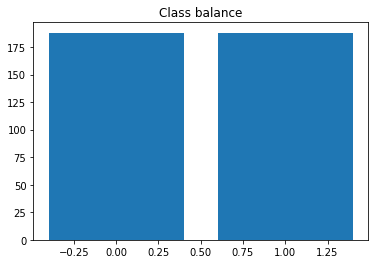

Majority class: 188
Minority class: 188
Proportion: 1.0 : 1


In [424]:
unbal = result
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')


### Undersampling

Proportion: 2.94 : 1


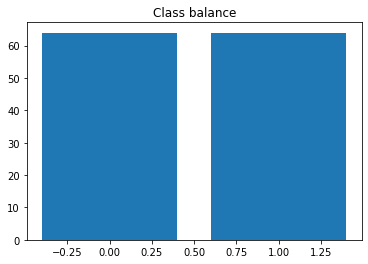

Majority class: 64
Minority class: 64
Proportion: 1.0 : 1


In [425]:
df = pd.read_csv('resultBeforeSMOTE.csv', sep=',')

# Class count

#df.drop(columns=['id'], inplace=True)
target_count = df['class'].value_counts()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

count_class_0, count_class_1 = target_count[1-ind_min_class],target_count[ind_min_class]

print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')



# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]

#Random under-sampling

df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)




unbal = df_test_under
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

df_test_under.to_csv(r'resultAfterUndersampling.csv', index = False)

# Featuree Selection

### Supervised

In [426]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler


result = pd.read_csv('resultAfterSMOTE.csv', sep=',')


y = result.pop('class').values
X = result.values
#y = test[:,0]



print("Initial shape: "+str(X.shape))
X_norm = MinMaxScaler().fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=result.columns)
#print(X_norm)
kbest = SelectKBest(chi2, k=100)
X_new = kbest.fit_transform(X_norm, y)
print("Shape after reduction : "+str(X_new.shape));

column_names = result.columns[kbest.get_support()]
X_new = pd.DataFrame(X_norm, columns=column_names)
print(X_new.shape)

df2 = pd.DataFrame(y, columns=['class'])
resultKBest = pd.concat([X_new, df2], axis=1)

#resultKBest = np.concatenate((X_new, y), axis=0)
# = pd.concat([, y], axis=1, ignore_index=True)
print(resultKBest)
resultKBest.to_csv(r'resultKBest.csv', index = False)



Initial shape: (376, 753)
Shape after reduction : (376, 100)
(376, 100)
          b3  GNE_SNR_SEO  IMF_NSR_TKEO  det_entropy_shannon_3_coef  \
0    0.00000     0.000000      0.000000                    0.000000   
1    0.00000     0.000000      0.000000                    0.000000   
2    0.00000     0.000000      0.000000                    0.000000   
3    0.00000     0.000000      0.000000                    0.000000   
4    0.00000     0.000000      0.000000                    0.000000   
5    0.00000     0.000000      0.000000                    0.000000   
6    0.00000     0.000000      0.000000                    0.000000   
7    0.00000     0.000000      0.000000                    0.000000   
8    0.00000     0.000000      0.000000                    0.000000   
9    0.00000     0.000000      0.000000                    0.000000   
10   0.00000     0.000000      0.000000                    0.000000   
11   0.00000     0.000000      0.000000                    0.000000   
12   

In [427]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

result = pd.read_csv('resultAfterSMOTE.csv', sep=',')


y = result.pop('class').values
X = result.values
#y = test[:,0]


#2. Feature selection using decision tree ensembles
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print("Feature ranking =",clf.feature_importances_)
print("Original data shape:",X.shape,"\nNew data shape:",X_new.shape)
df2 = pd.DataFrame(y, columns=['class'])

column_names = result.columns[model.get_support()]
df1 = pd.DataFrame(X_new, columns=column_names)
print(df1)

resultETC = pd.concat([df1, df2], axis=1)
#resultETC = pd.concat([X_new, y], axis=1, ignore_index=True)
print(resultETC)
resultETC.to_csv(r'resultETC.csv', index = False)

Feature ranking = [0.         0.0049866  0.         0.         0.         0.
 0.         0.         0.00168007 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00168007 0.         0.         0.01       0.
 0.0049866  0.         0.         0.         0.         0.
 0.         0.         0.         0.01333333 0.         0.
 0.00168007 0.         0.0049866  0.         0.         0.
 0.0049866  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00168007 0.         0.
 0.         0.         0.         0.         0.00168007 0.
 0.0049866  0.         0.         0.         0.         0.00168007
 0.         0.         0.     

In [428]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel



#2. Lasso-based feature selection using SVMs with L1 norm
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print("Original data shape:",X.shape,"\nNew data shape:",X_new.shape)
df2 = pd.DataFrame(y, columns=['class'])

column_names = result.columns[model.get_support()]
df1 = pd.DataFrame(X_new, columns=column_names)
print(df1)

resultLSVC = pd.concat([df1, df2], axis=1)
#resultLSVC = pd.concat([X_new, y], axis=1, ignore_index=True)
print(resultLSVC)
resultLSVC.to_csv(r'resultLSVC.csv', index = False)

Original data shape: (376, 753) 
New data shape: (376, 0)
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[376 rows x 0 columns]
     class
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     0.0
12     1.0
13     1.0
14     0.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
..     ...
346    0.0
347    0.0
348    0.0
349    0.0
350    0.0
351    0.0
352    0.0
353    0.0
354    0.0
355    0.0
356    0.0
357    0.0
358

/Users/joaotiagoaparicio/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


### Unsupervised

In [429]:
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv('resultBeforeSMOTE.csv', sep=',')

X = df.drop(columns = ['class'])

#print(df)




selector = VarianceThreshold(0.1*10**-12)#X.var().mean())
#selector = VarianceThreshold(data.var().mean())
selector.fit(X)
X_new = X[X.columns[selector.get_support(indices=True)]]

#selector.fit(X)
#X_new = selector.fit_transform(X.var())
print(X_new.shape)
X_new.to_csv(r'resultLowVariance.csv', index = False)

(252, 753)


(581011, 55)

In [431]:
CTdata.head

<bound method NDFrame.head of         2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  \
0       2590   56   2  212   -6   390  220  235  151  6225  ...     0     0   
1       2804  139   9  268   65  3180  234  238  135  6121  ...     0     0   
2       2785  155  18  242  118  3090  238  238  122  6211  ...     0     0   
3       2595   45   2  153   -1   391  220  234  150  6172  ...     0     0   
4       2579  132   6  300  -15    67  230  237  140  6031  ...     0     0   
5       2606   45   7  270    5   633  222  225  138  6256  ...     0     0   
6       2605   49   4  234    7   573  222  230  144  6228  ...     0     0   
7       2617   45   9  240   56   666  223  221  133  6244  ...     0     0   
8       2612   59  10  247   11   636  228  219  124  6230  ...     0     0   
9       2612  201   4  180   51   735  218  243  161  6222  ...     0     0   
10      2886  151  11  371   26  5253  234  240  136  4051  ...     0     0   
11      2742  134  22 

In [432]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(CTdata.values)
mat = imp.transform(CTdata.values)
data = pd.DataFrame(mat, columns=CTdata.columns)
data.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [433]:
from sklearn.preprocessing import Normalizer

transf = Normalizer().fit(data)
norm_data = pd.DataFrame(transf.transform(data, copy=True), columns= data.columns)
norm_data.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,5.810110e+05,5.810110e+05,5.810110e+05,5.810110e+05,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.694705,0.037415,0.003527,0.062179,0.011274,0.473398,0.050413,0.053016,0.033865,0.412571,...,0.000022,0.000019,6.677510e-07,7.044198e-07,4.255639e-08,9.538992e-08,0.000005,0.000005,0.000003,0.000516
std,0.160143,0.030569,0.002546,0.049650,0.015207,0.214233,0.015350,0.014955,0.013812,0.187967,...,0.000071,0.000067,1.285552e-05,1.246340e-05,2.977421e-06,4.214799e-06,0.000033,0.000032,0.000026,0.000440
min,0.318474,0.000000,0.000000,0.000000,-0.059731,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000107
25%,0.577103,0.012761,0.001766,0.023677,0.001481,0.305075,0.038763,0.041632,0.024027,0.268354,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000240
50%,0.712996,0.029042,0.002902,0.050871,0.006471,0.477152,0.049253,0.052527,0.031884,0.411329,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000380
75%,0.821358,0.056179,0.004547,0.088353,0.016138,0.644977,0.059661,0.062571,0.041336,0.549669,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000570
max,0.992112,0.176776,0.023347,0.297469,0.150797,0.890341,0.126210,0.123664,0.123977,0.921661,...,0.000347,0.000379,3.636351e-04,2.842716e-04,2.240990e-04,2.167324e-04,0.000296,0.000298,0.000290,0.003028


In [434]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df
  
df = dummify(data, cols_sb.columns)
df.describe(include='all')

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [435]:

#Should have normalization and balancing...

#Balancing

unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

##SMOTE

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'data': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['class'] == min_class]
df_class_max = unbal[unbal['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)

y = unbal.pop('class').values
X = unbal.values
smote_x, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()

#df_SMOTE = pd.concat([pd.DataFrame(smote_x), pd.DataFrame(smote_y)], axis=1)
df_SMOTE = pd.DataFrame(smote_x)
df_SMOTE.columns = unbal.columns
df_SMOTE['class'] = smote_y
#print(df_SMOTE.dtypes)
#print(smote_y)

values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()
multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()



KeyError: 'class'